# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "&q=" + city
    request_url = query_url + city_url+ "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # Call api request
        api_response = requests.get(request_url)
        city_weather = api_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | mount pearl
Processing Record 7 of Set 1 | bargara
City not found. Skipping...
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | patnanungan
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | sabha
Processing Record 13 of Set 1 | seogwipo
City not found. Skipping...
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | sultanah
Processing Record 16 of Set 1 | aoulef
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,16.42,68,38,8.86,SH,1706563102
1,tralee,52.2704,-9.7026,3.85,77,7,2.51,IE,1706563103
2,iqaluit,63.7506,-68.5145,-30.73,67,100,0.00,CA,1706563104
3,port-aux-francais,-49.3500,70.2167,3.94,70,99,16.61,TF,1706563104
4,mount pearl,47.5166,-52.7813,-2.25,95,100,8.23,CA,1706563163


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.42,68,38,8.86,SH,1706563102
1,tralee,52.2704,-9.7026,3.85,77,7,2.51,IE,1706563103
2,iqaluit,63.7506,-68.5145,-30.73,67,100,0.00,CA,1706563104
3,port-aux-francais,-49.3500,70.2167,3.94,70,99,16.61,TF,1706563104
4,mount pearl,47.5166,-52.7813,-2.25,95,100,8.23,CA,1706563163


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

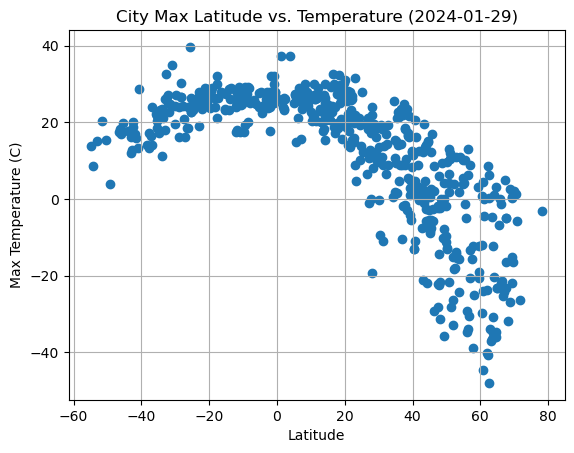

In [75]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-01-29)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

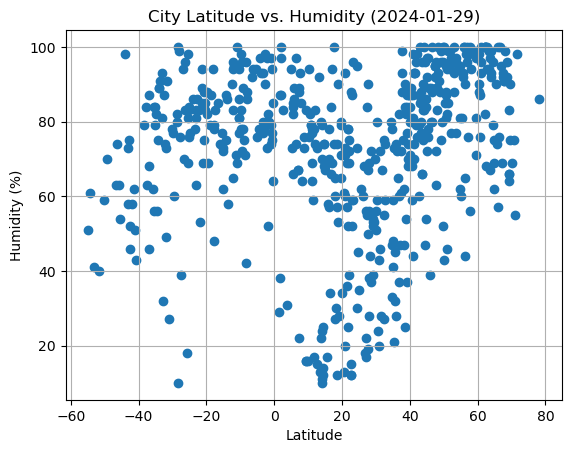

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-29)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

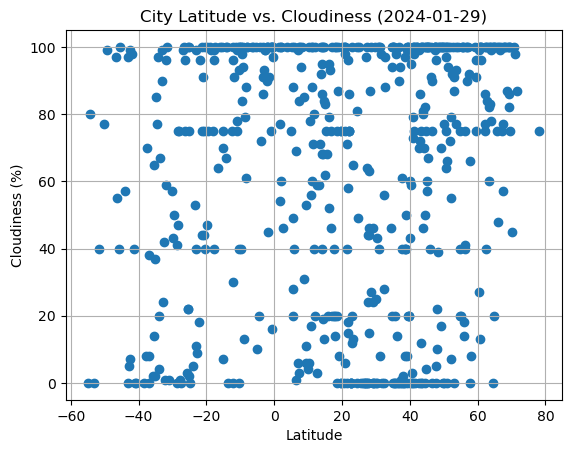

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-29)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

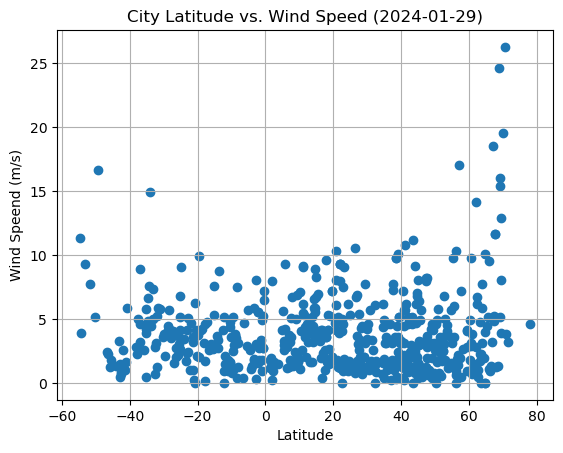

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-29)")
plt.ylabel("Wind Speend (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
def lin_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    ax = plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.xlabel("Latitude")
    print(f"The r-value is {rvalue**2}")
    plt.annotate(line_eq,(0,13), fontsize=15,color="red")
    plt.show()
    return ax

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tralee,52.2704,-9.7026,3.85,77,7,2.51,IE,1706563103
2,iqaluit,63.7506,-68.5145,-30.73,67,100,0.00,CA,1706563104
4,mount pearl,47.5166,-52.7813,-2.25,95,100,8.23,CA,1706563163
6,patnanungan,14.7833,122.1833,24.84,74,84,8.93,PH,1706563165
8,sabha,27.0377,14.4283,10.74,56,0,3.65,LY,1706563166


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.42,68,38,8.86,SH,1706563102
3,port-aux-francais,-49.3500,70.2167,3.94,70,99,16.61,TF,1706563104
5,grytviken,-54.2811,-36.5092,8.53,61,80,3.88,GS,1706563165
7,ushuaia,-54.8000,-68.3000,13.81,51,0,11.32,AR,1706563166
13,saint-philippe,-21.3585,55.7679,24.77,85,44,3.19,RE,1706563169


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6228833218472231


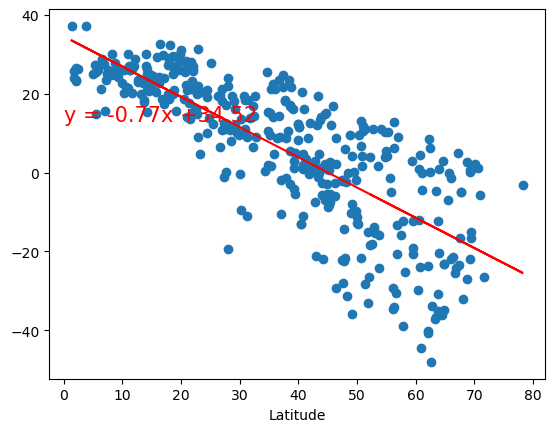

In [97]:
# Linear regression on Northern Hemisphere
lin_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is 0.34098654806105627


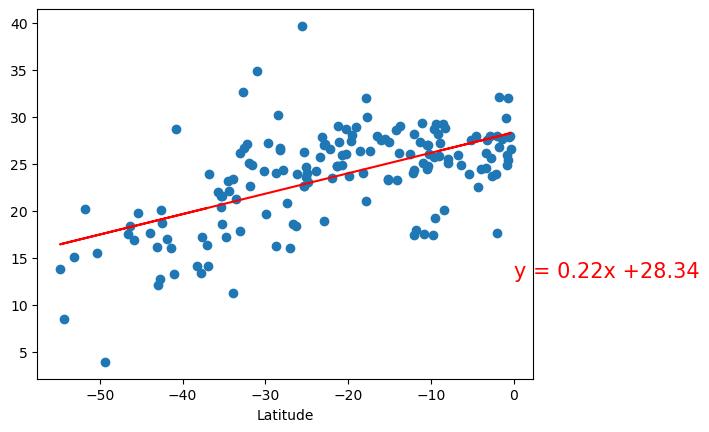

In [98]:
# Linear regression on Southern Hemisphere
lin_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** In the plot of latitude versus max temperature for the northern hemisphere, the predicted temperature decreases as the latitude increases, suggesting a negative correlation between the two variables. In the plot of latitude versus max temperature for the southern hemisphere, the predicted temperature increases as the latitude increases, suggesting a positive linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1802245312248912


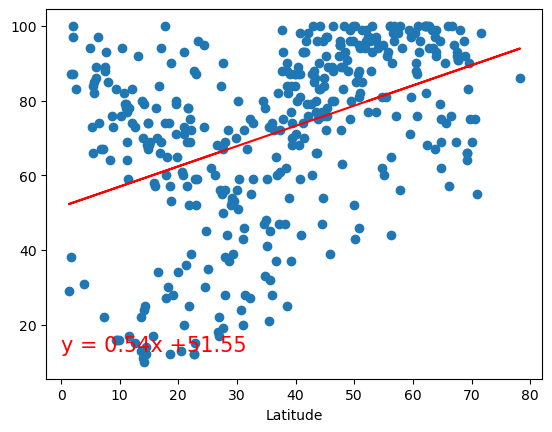

In [84]:
lin_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is 0.1672357473903651


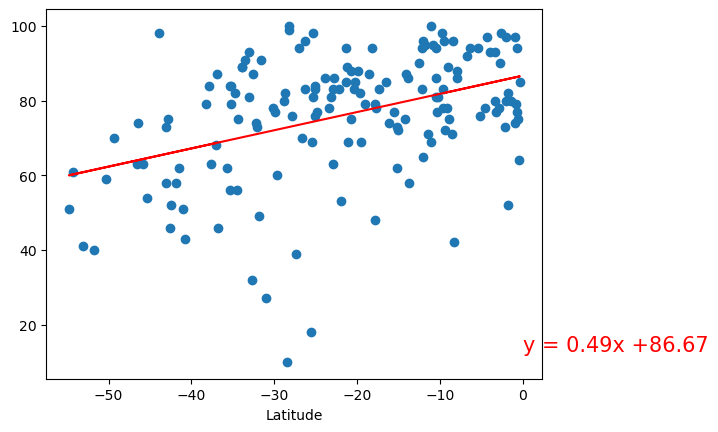

In [99]:
lin_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** The linear regression lines for the relationship between latitude and humidity appear to be positive for both the northern and southern hemispheres. This means that as the latitude increases one could predict the humidity would increase as well.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.03919454292162756


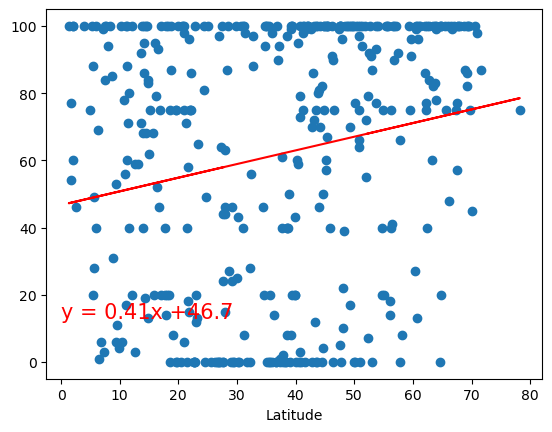

In [86]:
lin_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is 0.14957127729097147


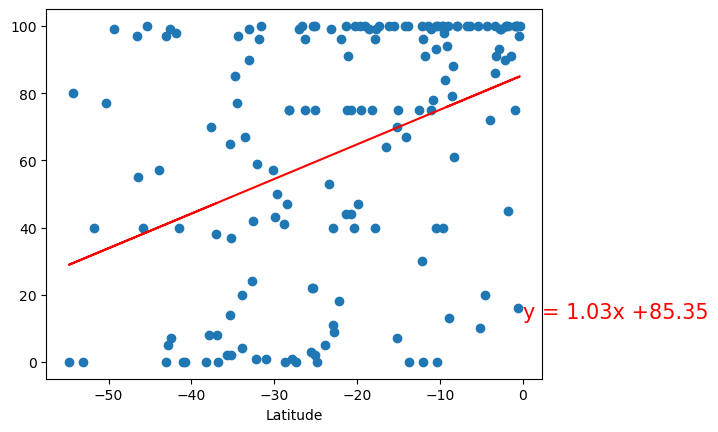

In [87]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Both linear regression lines for the relationship between latitude and cloudiness have positive slopes. This suggests a positive relationship. However, the data is varied away from the linear regression line.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.014730804452361208


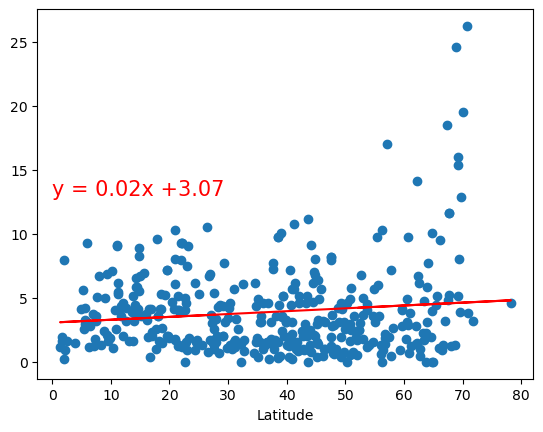

In [88]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is 0.04310843495676767


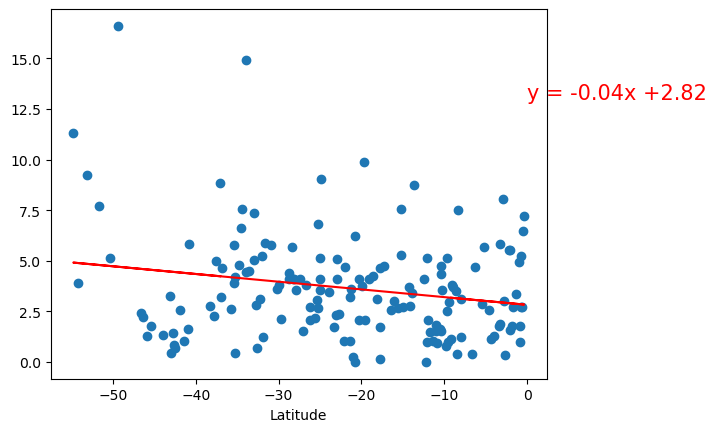

In [89]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed in the northern hemisphere is positively correlated while in the southern hemisphere it is negatively correlated.